In [1]:
import xarray as xr
import pandas as pd
from utilities.plotting import *
from utilities.utils import *

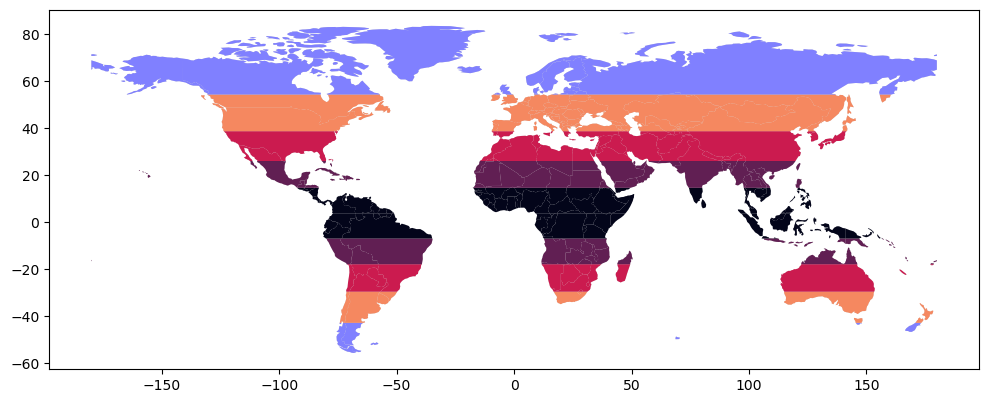

In [2]:
lat_bands, colors = plot_lat_bands(get_world())

cs_fraction
10
25
50
100
250
500
750
1000
2500
7500
10000
storage_ratio
10
25


/central/groups/carnegie_poc/awongel/clab_concentrated_solar/utilities/utils.py:175: RuntimeWarning: Mean of empty slice
  add_to_df['mean cs fraction'] = [np.nanmean(ns_merged_bands[label]['value'].values) for label in labels]
/home/awongel/miniconda3/envs/table_pypsa_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/central/groups/carnegie_poc/awongel/clab_concentrated_solar/utilities/utils.py:177: RuntimeWarning: All-NaN slice encountered
  add_to_df['median cs fraction'] = [np.nanmedian(ns_merged_bands[label]['value'].values) for label in labels]
/home/awongel/miniconda3/envs/table_pypsa_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


50
100
250
500
750
1000
2500
7500
10000
gas_price_min_frac
10
25
50
100
250
500
750
1000
2500
7500
10000


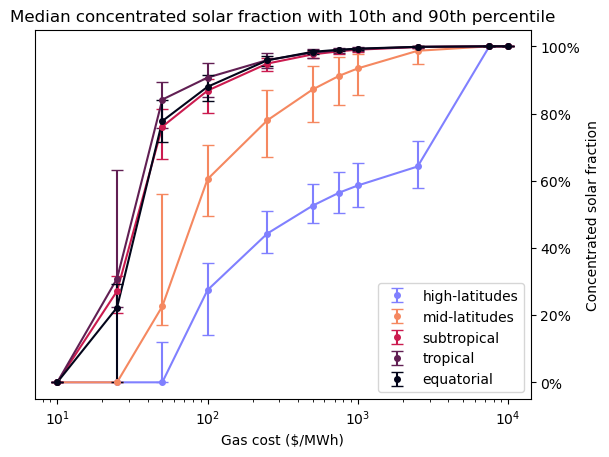

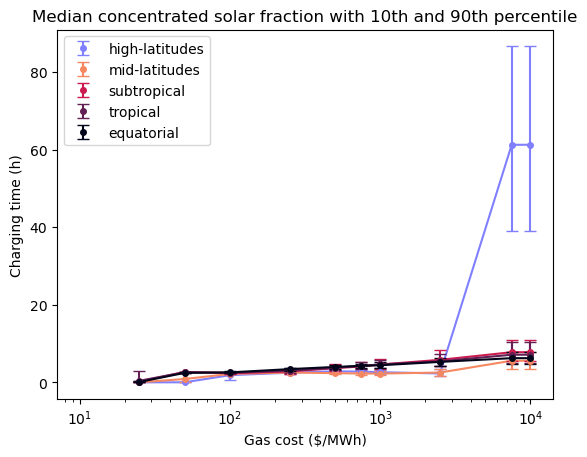

In [3]:

gas_costs=[10, 25, 50, 100, 250, 500, 750, 1000, 2500, 7500, 10000]
case = 'CSP_storage'

for var in ['cs_fraction', 'storage_ratio', 'gas_price_min_frac']:
    print(var)
    results = None
    latitude_df = pd.DataFrame()
    for gas_cost in gas_costs:
        print(gas_cost)
        if not var == 'gas_price_min_frac':
            results = store_results_map(case, gas_cost, var)

            # Save the results to a netcdf file
            if not os.path.exists(f'output_data/{var}_{case}_gas{gas_cost}.nc'):
                results.to_netcdf(f'output_data/{var}_{case}_gas{gas_cost}.nc')
            masked_dataset = mask_data_world(xr.open_dataset(f'output_data/{var}_{case}_gas{gas_cost}.nc'), get_world())
            latitude_df = calculate_lat_band_mean(latitude_df, masked_dataset, lat_bands, gas_cost)
        else:
            results = store_results_map(case, gas_cost, var, result_array=results)
            
    if var == 'gas_price_min_frac':
        if not os.path.exists(f'output_data/{var}_{case}_threshold0p5.nc'):
            results.to_netcdf(f'output_data/{var}_{case}_threshold0p5.nc')
    else:
        plot_line(latitude_df, colors, var)

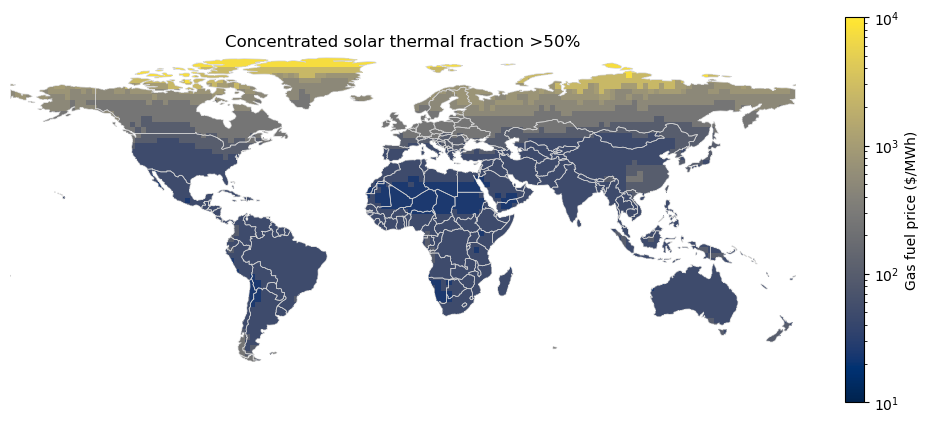

In [4]:
plot_result_map('output_data/gas_price_min_frac_CSP_storage_threshold0p5.nc', 'CSP_storage', 'Concentrated solar thermal fraction >50%', 'Gas fuel price ($/MWh)')

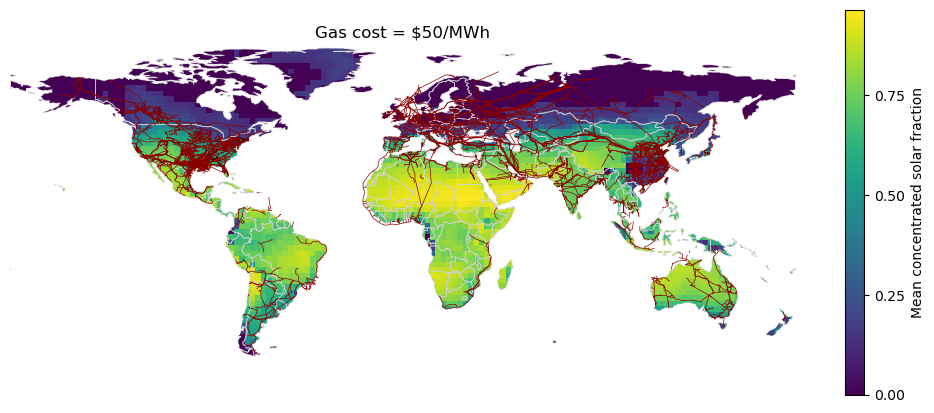

In [5]:
plot_result_map('output_data/cs_fraction_CSP_storage_gas50.nc', 'CSP_storage', 'Gas cost = $50/MWh', 'Mean concentrated solar fraction', gas_infrastructure=True)

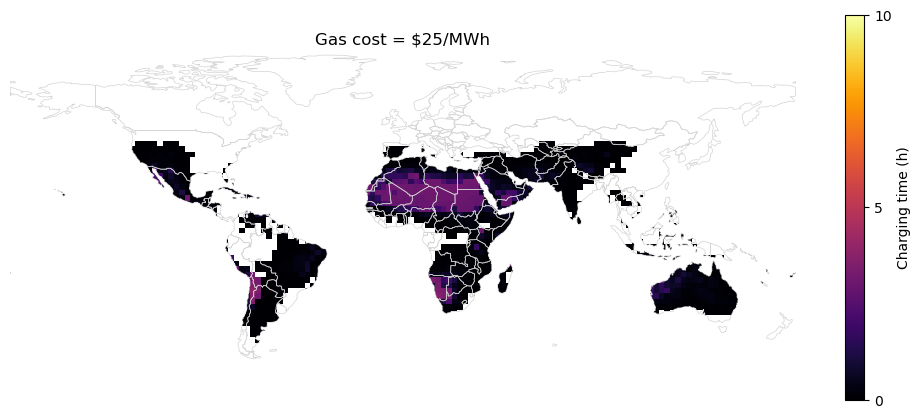

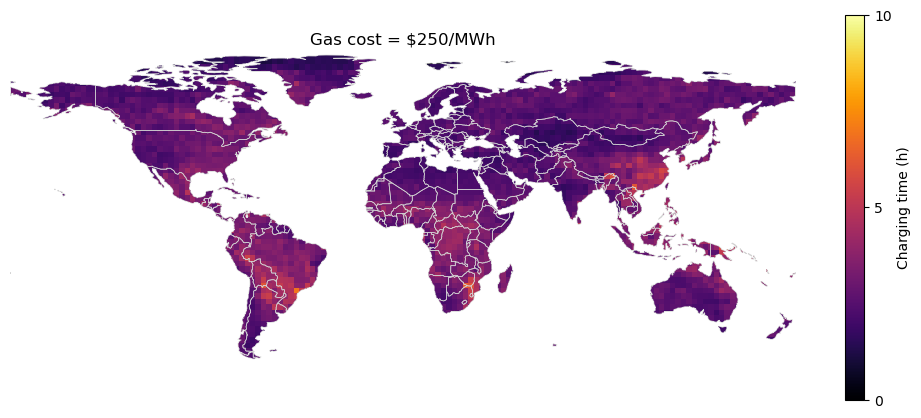

In [6]:
for gas_cost in [25, 250]:
    plot_result_map(f'output_data/storage_ratio_CSP_storage_gas{gas_cost}.nc', 'CSP_storage', f'Gas cost = ${gas_cost}/MWh', 'Charging time (h)')
